# Energy consumption of a Web Application Implemented in Different Programming Languages and Web Frameworks
*Probabilistic Programming 2025 Exam by Raúl Pardo ([raup@itu.dk](mailto:raup@itu.dk)) and Andrzej Wąsowski ([wasowski@itu.dk](mailto:wasowski@itu.dk))*<br/>
*version 1.0.0 2025-03-20 08:40*


In this exam, your task is to analyze energy consumption of different implementations of a web application.
The goal is to determine whether there are differences in energy consumption in different implementations of the web application or in its API endpoints.
This analysis is of utmost importance, as it might help software engineers to make informed choices that lower energy consumption. For instance, a plausible hypothesis is that lower level programming languages such as Rust consume less energy than higher level languages such as Python.
A preconception in this domain is that running time is the driving factor in energy consumption.
Are these true? The data in this exam and the analysis you will develop will allow to answer this type of questions.

## Data

The dataset contains $N = 1960$ measurements of energy consumption for different implementations and functionality of a web application. For each setup, there are 20 measurements. The dataset is in the file [dataset.csv](dataset.csv). The variables in the dataset are:

* **Application**. This variable has the form `<programming_language>-<web_framework>`. It specifies the programming language and web framework used in the experiment. For instance, `rust-actix` denotes the web framework Actix for the programming language Rust, or `c-sharp-razor` denotes the web framework Razor for the programming language C#.
    * Note that if a hypothesis involves only programming language, you need to extract it from the values in this variable.

* **Endpoint**. This variable refers to the API endpoints of the web application. For example, `/api/register` refers to the API endpoint used for registering users in the web application, or `/logout` is used for logging out of the system.

* **Runtime**. This variable indicates the time it took to process the request to the endpoint in seconds.

* **Energy consumption**. This variable indicates the energy consumed for processing the request to the endpoint in Joules.

Each row in the dataset is a measurement of the total energy consumed and runtime after processing a request in the corresponding API endpoint. The *Application* variable in each row indicates the web framework used for the measurement.

## Hypotheses

To analyze energy consumption in the different implementations, you must investigate the following hypotheses:

* **H1** - The web framework `c-sharp-razor` consumes more energy than any other web framework in the dataset.

* **H2** - The programming language `javascript` consumes the least amount of energy compared to any other programming language in the dataset.

* **H3** - Runtime has a stronger impact on energy consumption for some API endpoints than others. That is, the effect of runtime on energy consumption is larger for some API endpoints than others.

Your task is to use Bayesian Inference and Regression to decide whether these hypotheses hold, or possibly reject them. This includes:

* Loading, restructuring and transforming the data as needed.

* Designing Bayesian regression models and using inference algorithms to test the above hypotheses in PyMC.

* Explaining your model idea in English, preferably using a figure, and showing the Python code.

* Checking and reflecting (in writing) on the quality of the sampling process, considering warnings from the tool, sampling summary statistics, trace plots, and autocorrelation plots. Comment whether the quality of the sampled trace is good, and whether you had to make any adjustments during modeling and/or sampling.

* Visualizing the posterior information appropriately to address the hypotheses.
  

You should hand in a zip file with a Jupyter notebook and the data file (so that we can run it), and a **PDF file rendering of the Jupyter notebook**, so that your work can be assessed just by reading this file. It appears that the best PDF rendering is obtained by File / Export to HTML, and then saving/printing to PDF from your browser.

Make sure the notebook is actually a **report** readable to the examiners, especially to the censor who has not followed the course. The report should include:
* A brief introduction.
* Explanations on how data is loaded and cleaned.
* Explanations on analysis and model design (for each of the models you consider).
* A discussion of sampling quality (for each model) and all the plots that you present, and a reflection/decision on the outcome for each hypothesis.
* An overall conclusion.

**IMPORTANT:** For the tasks below, your code must accompany an explanation of its meaning and intended purpose. **Source code alone is not self-explanatory**. As mentioned above, you should also reflect on the results you get, e.g., highlighting issues with the data, or issues, pitfalls and assumptions of a model. **Exams containing only source code or very scarce explanations will result in low grades, including failing grades.**





## Minimum requirements 

1. Design a regression model to predict energy consumption using web framework as a predictor.
  
2. Analyze hypothesis H1 using the regression model in (1.).

## Ideas for extension

**Groups aiming at grade 7 and more should complete the following tasks:**
    
3. Analyze hypothesis H2, if necessary design a new model.
        
4. Perform prior predictive checks in all your models. Explain why the priors you selected are appropriate.
    
5. Perform posterior predictive checks in all your models. Discuss the results in the posterior predictive checks.
    
6. Discuss trace convergence in all your models.
    
**Groups aiming at grade 10 and higher should try 3-5 ideas from below or add some of your own:**

7. Analyze hypothesis H3, if necessary design a new model.
    
8. Perform a counterfactual analysis in your model for H3: For each endpoint, plot posterior predictions on energy consumption for a runtime value much larger than those in the dataset. Does this affect/introduce differences between energy consumption for different endpoints?
    
9. Design models with a transformation of the predicted variable, i.e., energy consumption. For instance, 
    * Build a model to analyze the probability that the energy consumption of a web framework is below 0.4 Joules. You may consider versions of this task involving other predictors.
    * Transform energy consumption into an ordinal variable representing an energy mark, e.g., an energy consumption in 0.0-0.2 is energy mark A, energy consumption in 0.2-0.4 is energy mark B and energy consumption of ≥ 0.4 is energy mark C. Use an ordinal regression model to analyze the energy mark of each framework. You may consider versions of this task involving other predictors.
    
10. Use information criteria to compare the models to analyze H1, H2 and H3.
    
11. Design a meaningful multilevel model in the context of these data.
   
12. Use causal reasoning to analyze causal relations between the variables in the dataset.

---

## 📘 **A brief introduction**

This report investigates the energy consumption of a web application implemented using different programming languages and web frameworks. The motivation is to assess whether certain implementations are more energy-efficient, with the broader goal of helping software engineers make sustainable design choices.

Using a dataset of 1,960 energy measurements collected across multiple combinations of programming languages, web frameworks, and API endpoints, we apply Bayesian statistical modeling to examine three main hypotheses:

1. **H1**: The web framework *c-sharp-razor* consumes more energy than any other web framework.
2. **H2**: The programming language *javascript* consumes the least amount of energy compared to all other languages.
3. **H3**: The effect of runtime on energy consumption varies by API endpoint.

We employ regression modeling in **PyMC**, following the Bayesian inference techniques taught in the *Statistical Rethinking* course by Richard McElreath. This includes careful model specification, prior and posterior predictive checks, diagnostics of sampling quality (e.g., trace plots, R-hat, effective sample sizes), and interpretation of posterior distributions.

The analysis involves data transformation (e.g., separating language and framework), encoding categorical predictors, and comparing models based on their ability to support or refute the hypotheses. Results are presented visually and numerically, with reflections on modeling assumptions and inference quality.



## 🧹 **Data cleaning and preparation**

In [1]:
### IMPORTS ###
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [3]:
# Extract language & framework name, and giving them a column each
df[['language', 'framework']] = df['application'].str.extract(r'([^-]+(?:-sharp)?)-(.+)')

# Get unique frameworks
print(df['framework'].unique())

['actix' 'sinatra' 'gorilla' 'gin' 'flask' 'razor' 'express']


In [4]:
df

,application,endpoint,energy_consumption,runtime,language,framework
0,rust-actix,/api/register,0.449358,0.148812,rust,actix
1,rust-actix,/api/register,0.433871,0.148895,rust,actix
2,rust-actix,/api/register,0.270844,0.094729,rust,actix
3,rust-actix,/api/register,0.479776,0.163467,rust,actix
4,rust-actix,/api/register,0.268833,0.092300,rust,actix
...,...,...,...,...,...,...
1955,javascript-express,/logout,0.096436,0.032214,javascript,express
1956,javascript-express,/logout,0.097559,0.032214,javascript,express
1957,javascript-express,/logout,0.096922,0.032214,javascript,express
1958,javascript-express,/logout,0.097086,0.032214,javascript,express


_________________
* **H1** - The web framework `c-sharp-razor` consumes more energy than any other web framework in the dataset.
_________________

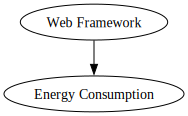

In [5]:
### Initializing a Causal Inference Model (DAG: Directed Acyclic Graph)
# The visualisation below provides a conceptual overview over our model and its response variable and predictor
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

CausalGraphicalModel(
    nodes=["Web Framework", "Energy Consumption"],
    edges=[
        ("Web Framework", "Energy Consumption"),
    ]
).draw()

In [6]:
# Make c-sharp-razor the baseline
df['framework'] = df['framework'].astype('category')
df['framework'] = df['framework'].cat.reorder_categories(
    ['razor' if 'razor' in x else x for x in df['framework'].cat.categories],
    ordered=False
)
df_dummies = pd.get_dummies(df['framework'], drop_first=True)  # drop baseline

# Combine with original data
X = df_dummies
y = df['energy_consumption'].values


## **To evaluate the hypothesis (h1)**:

We build a Bayesian linear (?) regression model where energy consumption is the dependent variable and the web framework is the categorical predictor.

Modeling goes like: </br>
1. Starting with Bayesian linear regression model with a Gaussian likelihood.
2. Energy consumption is modeled as a linear function of the framework.

## Bayesian Regression
to explain how energy consumption depends on the web framework.

* We are assuming a **linear model**:

\begin{align}
h_i    & \sim \mathcal N (\mu_i, \sigma)         & \quad [\,\text{likelihood}\, h \text{ predicted var}]   \\
\mu_i  & =    \alpha + \beta_{F[i]}  & \quad [\,\text{linear model}\, x \text{ predictor}] \\
\alpha & \sim \mathcal N (0, 10)            & \quad [\,\alpha \text{ prior, parameter}\,]        \\
\beta  & \sim \mathcal N (0, 0.5)            & \quad [\,\beta  \text{ prior, parameter}\,]        \\
\sigma & \sim \text{Exponential} (1)             & \quad [\,\sigma \text{ prior, parameter}\,]
\end{align}

The likelihood assumes that the observed energy consumption values $h_{i}$ are normally distributed around the predicted mean $\mu_i$ with a constant standard deviation $\sigma$. 

The mean $\mu_i$ is modeled as a linear combination of the intercept $\alpha$ and the framework effects $\beta$. 

The prior probailities $\alpha$, $\beta$, and $\sigma$ are chosen to be very weakly informative, to reflect our little domain knowledge about the energy consumption of the frameworks.


<!-- Each observed energy consumption value h_{i} (for each request in the dataset) is assumed to be normally distributed with the expected (mean) energy consumption for observation and the constant standard deviation</br>
The mean is linearly dependent on the web framework. The model predicts the _expected_ enrgy ($\mu_i$) and then allows some noise around it.
- $\alpha$: The baseline energy consumption — in our case, this will be the mean energy for the baseline framework (`c-sharp-razor`).

- $\beta_{i}$: The effect of the framework used in observation \( i \), relative to the baseline. Each framework gets its own coefficient (except the baseline, which is 0).

In Bayesian modeling, we need to put priors on all the parameters: $\alpha$, $\beta$, $\sigma$ to express our uncertainty before seeing data.

Based on EDA - we choose priors -->



## Priors

Prior probabilities reasoning:

1. **Intercept** ($\alpha \sim \mathcal N (0, 10)$):
    - Reasoning:
        - The intercept represents the baseline energy consumption for the baseline framework (`c-sharp-razor`).
        - We choose a weakly informative prior with a mean of 0 and a large standard deviation (10) to allow for a wide range of possible values.
        - This reflects our uncertainty about the baseline energy consumption before observing the data.

2. **Web Framework Effects** ($\beta \sim \mathcal N (0, 0.5)$):
    - Reasoning:
        - The framework effects represent the deviations from the baseline energy consumption for each framework.
        - We choose a weakly informative prior with a mean of 0 and a standard deviation of 0.5 to allow for moderate deviations from the baseline.
        - This reflects our belief that most frameworks will have similar energy consumption to the baseline, but some may deviate significantly.

3. **Standard Deviation of Resiualduals** ($\sigma \sim \text{Exponential} (1)$):
    - Reasoning:
        - The standard deviation of the residuals represents the variability in energy consumption that is not explained by the model.
        - We choose a weakly informative exponential prior with a lambda of 1 to allow for a wide range of possible values.
        - This reflects our uncertainty about the variability in energy consumption before observing the data.

In [7]:
### We should not use the description of the data to inform us before choosing priors right?
# We can use the description of the data to inform us about the model, but not to inform us about the priors.



# print(df["energy_consumption"].describe())

In [8]:
### Using PyMC3 to fit a model
# The priors are defined as of described above.
# mu is a combination of alpha and the betas, which are the coefficients for each of the dummy variables.
# The likelihood is defined as a normal distribution with mu and sigma.
# trace_h1 is an InferenceData object that contains the posterior samples, which can be used for further analysis and visualization.

# Sampling quality!!!! ????

with pm.Model() as model_h1:
    # Priors
    alpha = pm.Normal("alpha", mu = 0, sigma = 10)
    betas = pm.Normal("betas", mu = 0, sigma = 0.5, shape=X.shape[1])
    sigma = pm.Exponential("sigma", lam = 1)
    
    # Expected value
    mu = alpha + pm.math.dot(X.values, betas)
    
    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    trace_h1 = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.31,0.02,0.28,0.34,0.0,0.0,2626.44,3329.50,1.0
betas[0],-0.10,0.02,-0.14,-0.06,0.0,0.0,3656.34,4567.16,1.0
betas[1],0.11,0.02,0.06,0.15,0.0,0.0,3652.11,5010.52,1.0
betas[2],0.01,0.02,-0.03,0.05,0.0,0.0,3697.41,5127.01,1.0
betas[3],0.02,0.02,-0.02,0.06,0.0,0.0,3276.97,5312.24,1.0
betas[4],0.38,0.02,0.34,0.42,0.0,0.0,3106.60,4926.68,1.0
betas[5],0.10,0.02,0.06,0.14,0.0,0.0,3644.58,4927.82,1.0
sigma,0.27,0.00,0.26,0.27,0.0,0.0,5827.12,5049.31,1.0


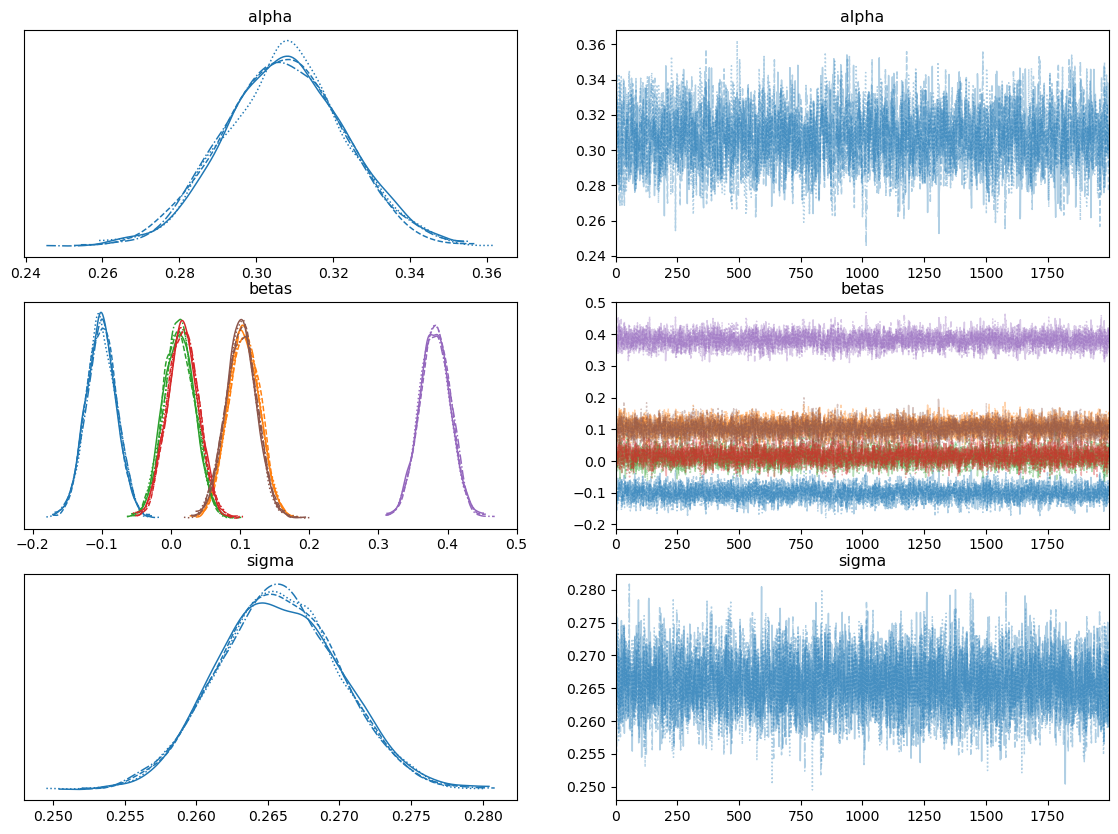

In [9]:
### Plot showing the posterior distributions of the parameters ???

az.plot_trace(trace_h1, var_names=["alpha", "betas", "sigma"], 
              figsize=(14, 10), combined=False)
az.summary(trace_h1, round_to=2)

In [10]:
### Thoughts from the plot above
# The posterior distributions of the parameters are shown in the plot above.

# Bla bla. Beta peaks at around 0.31 bla bla

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

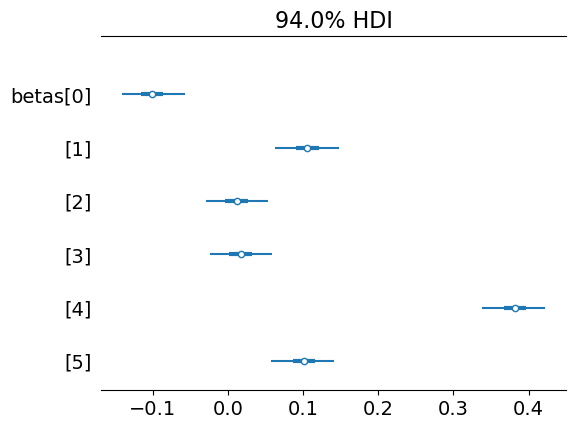

In [11]:
### HDI: Highest Density Interval
# The HDI is the range of values that contains 95% of the posterior distribution.
az.plot_forest(trace_h1, var_names=["betas"], combined=True)


# In this plot, `c-sharp-razor` is the baseline (intercept) at 0 on the x-axis. 
# Each beta coefficient represents the difference in energy consumption between another framwework and `c-sharp-razor`. 
# If a beta coefficient is negative, it means that c-sharp-razor has significantly higher energy consumption than that beta coefficient.
# If a beta coefficient is positive, it means that c-sharp-razor has significantly lower energy consumption than that beta coefficient.

# Thus, beta[0] has a lower energy consumption than c-sharp-razor, and specifically beta[4] has a much higher.
# Specifically, beta[4] seems to have a much higher energy consumption than c-sharp-razor.

In [12]:
# The following gives the probability that each framework consumes less energy than c-sharp-razor. 
# High probabilities (e.g., > 0.95) support H1.

posterior = trace_h1.posterior
prob_csharp_more = (posterior['betas'] < 0).mean(dim=("chain", "draw"))
prob_csharp_more = prob_csharp_more.to_dataframe().T
print(prob_csharp_more)


betas_dim_0    0    1      2         3    4    5
betas        1.0  0.0  0.301  0.223375  0.0  0.0


In [13]:
### Results of above
# Only beta[0] has a probability of > 0.95, which means that c-sharp-razor likely has a higher energy consumption than that specific framework.
# The other frameworks have a probability of < 0.95 (and actually < 0.29)
# which means that c-sharp-razor likely has a lower energy consumption than those specific frameworks.

## 🧮 **Conclusion - H1:**

Through the making of a Bayesian Linear Regression model that compares the other frameworks to the baseline "razor", we have looked at and visualised the results. And with H1 being that, "the web framework `c-sharp-razor` consumes more energy than any other web framework in the dataset", we find through the above analysis, that we have enough evidence to reject H1. All but one of the other frameworks likely consumes more energy than c-sharp-razor.

For us to be able to confirm the hypothesis, all the "trees?" for all the other betas in the HDI would need to be negative. We would also need all the beta posterior probabilites to be above 0.95, as it represents the probability that each beta consumes less energy than c-sharp-razor. 

-------------------------
### Quickly trying something (didn't work):

In [14]:
# part of lecture 2 or 3 (linear/multiple regression models)
                          
with model_h1:
    h1_data = pm.sample_posterior_predictive(trace_h1, var_names=["y_obs"], random_seed=42)

Sampling: [y_obs]


Output()

In [15]:
az.plot_ppc(
    trace_h1,
    num_pp_samples=100,
    figsize=(12, 6),
    var_names=["y_obs"],
    coords={"chain": [0]},
    backend="matplotlib",
)

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

_________________
* **H2** - The programming language `javascript` consumes the least amount of energy compared to any other programming language in the dataset.
_________________

In [16]:
# H2 contains a similar task as H1, but with a focus on programming languages rather than web frameworks.
# A specific "language" column is already created in the initial data preprocessing.
# Here the "Application"-column was split into "language" and "framework".

# To get an overview: Get unique programming languages
print(df['language'].unique())

['rust' 'ruby' 'go' 'python' 'c-sharp' 'javascript']


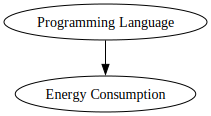

In [17]:
### Initializing a Causal Inference Model (DAG: Directed Acyclic Graph)
# The visualisation below provides a conceptual overview over our model and its response variable and predictor 
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

CausalGraphicalModel(
    nodes=["Programming Language", "Energy Consumption"],
    edges=[
        ("Programming Language", "Energy Consumption"),
    ]
).draw()

In [18]:
# Make javascript the baseline language
df['language'] = df['language'].astype('category')
df['language'] = df['language'].cat.reorder_categories(
    ['javascript'] + [cat for cat in df['language'].cat.categories if cat != 'javascript'],
    ordered=False
)

# Combine with original data
X_lang = pd.get_dummies(df['language'], drop_first=True)
y = df['energy_consumption'].values

## **To evaluate the hypothesis (h2)**:

We build a Bayesian linear (?) regression model where energy consumption is the dependent variable and the programming language is the categorical predictor.

Modeling goes like: </br>
1. Starting with Bayesian linear regression model with a Gaussian likelihood.
2. Energy consumption is modeled as a linear function of the language.

## Bayesian Regression
To explain how energy consumption depends on the specific programming language.


**!!!!!!!!!!!!!!!!!COPIED FROM H1!!!!!!!!!!!!!!!!!!!!!!** , New priors needed

* We are assuming a **linear model**:

\begin{align}
h_i    & \sim \mathcal N (\mu_i, \sigma)         & \quad [\,\text{likelihood}\, h \text{ predicted var}]   \\
\mu_i  & =    \alpha + \beta_{F[i]}  & \quad [\,\text{linear model}\, x \text{ predictor}] \\
\alpha & \sim \mathcal N (0, 10)            & \quad [\,\alpha \text{ prior, parameter}\,]        \\
\beta  & \sim \mathcal N (0, 0.5)            & \quad [\,\beta  \text{ prior, parameter}\,]        \\
\sigma & \sim \text{Exponential} (1)             & \quad [\,\sigma \text{ prior, parameter}\,]
\end{align}

The likelihood assumes that the observed energy consumption values $h_{i}$ are normally distributed around the predicted mean $\mu_i$ with a constant standard deviation $\sigma$. 

The mean $\mu_i$ is modeled as a linear combination of the intercept $\alpha$ and the framework effects $\beta$. 

The prior probailities $\alpha$, $\beta$, and $\sigma$ are chosen to be very weakly informative, to reflect our little domain knowledge about the energy consumption of the frameworks.


<!-- Each observed energy consumption value h_{i} (for each request in the dataset) is assumed to be normally distributed with the expected (mean) energy consumption for observation and the constant standard deviation</br>
The mean is linearly dependent on the web framework. The model predicts the _expected_ enrgy ($\mu_i$) and then allows some noise around it.
- $\alpha$: The baseline energy consumption — in our case, this will be the mean energy for the baseline framework (`c-sharp-razor`).

- $\beta_{i}$: The effect of the framework used in observation \( i \), relative to the baseline. Each framework gets its own coefficient (except the baseline, which is 0).

In Bayesian modeling, we need to put priors on all the parameters: $\alpha$, $\beta$, $\sigma$ to express our uncertainty before seeing data.

Based on EDA - we choose priors -->


## Priors

Prior probabilities reasoning:

**General Principles for Choosing Priors (as per "Statistical Rethinking" and good Bayesian practice):**
*   Priors should reflect knowledge *before* observing the current dataset. They should not be directly determined by summary statistics of the current data, as this amounts to using the data twice.
*   Ideally, priors come from previous research, domain expertise, or theoretical constraints.
*   When specific prior information is lacking, *weakly informative priors* are used. These are priors that are broad enough to let the data speak, but specific enough to keep the MCMC sampler in a reasonable parameter space and act as a form of regularization.
*   **Prior predictive checks** are essential to understand the implications of your chosen priors.

For this model (H1 - comparing `c-sharp-razor` to other frameworks):

1.  **Intercept** ($\alpha \sim \mathcal N (0.3, 0.5)$):
    - Reasoning:
        - The intercept $\alpha$ represents the mean energy consumption (in Joules) for the baseline framework (`c-sharp-razor`).
        - Energy consumption must be positive. A quick glance at typical energy values in similar contexts (or a very preliminary exploration, *not* formal statistics of the current dataset) might suggest values are often centered around a few tenths of a Joule.
        - We choose a Normal prior. To ensure it's mostly in the positive domain and weakly informative:
            - `mu = 0.3`: Assumes a baseline energy consumption around 0.3 Joules. This is a placeholder and should be refined by general knowledge if available, or kept very broad.
            - `sigma = 0.5`: Allows for a fairly wide range of plausible mean energy consumptions for the baseline. For example, 95% of the prior mass would be between roughly $0.3 - 2*0.5 = -0.7$ and $0.3 + 2*0.5 = 1.3$. Since energy cannot be negative, a HalfNormal or a Normal distribution more tightly concentrated on positive values might be even better if initial values are expected to be very close to zero. However, if values can be moderately large, this Normal prior might be acceptable, and the posterior will be updated by the data. *A prior predictive check is crucial here to see if this generates sensible energy values.*
        - *Alternative if values are strictly positive and often small:* $\alpha \sim \text{Exponential}(1)$ or $\alpha \sim \text{HalfNormal}(0.5)$.

2.  **Web Framework Effects** ($\beta \sim \mathcal N (0, 0.2)$):
    - Reasoning:
        - The $\beta$ coefficients represent the *differences* in mean energy consumption between other frameworks and the baseline (`c-sharp-razor`).
        - We expect these differences to be centered around 0 (i.e., no difference is a plausible starting assumption).
        - `sigma = 0.2`: This implies that we expect most differences to be within approximately -0.4 to +0.4 Joules. This is a weakly informative choice, suggesting that while frameworks might differ, the differences are not likely to be orders of magnitude larger than the baseline consumption itself. This should also be checked with prior predictive simulations.

3.  **Standard Deviation of Residuals** ($\sigma \sim \text{Exponential} (1)$):
    - Reasoning:
        - $\sigma$ represents the variability (standard deviation) in energy consumption measurements that is not explained by the framework. It must be positive.
        - An Exponential distribution is a common weakly informative prior for scale parameters. $\text{Exponential}(1)$ places more prior mass on smaller standard deviations but allows for larger ones. This suggests that while there will be noise, it's not expected to be excessively large compared to the mean effects.

### Prior Predictive Checks

In [43]:
import seaborn as sns

Sampling: [alpha, betas, sigma, y_simulated]


Plotting Prior Predictive Distribution for y_simulated (Energy Consumption):


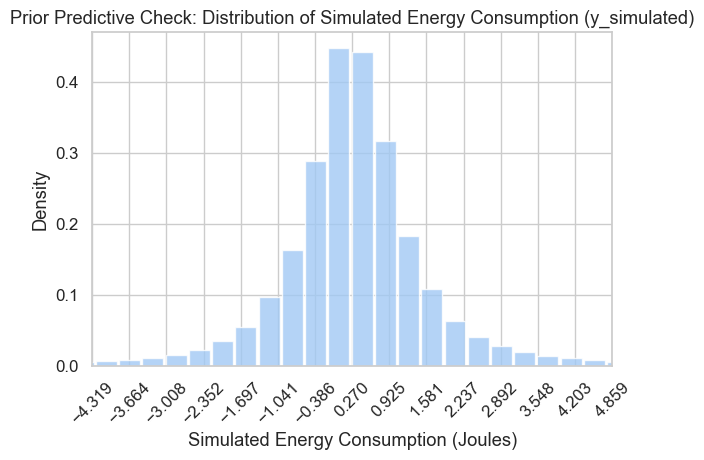


Plotting Prior Predictive Distribution for mu_values (Mean Energy Consumption):


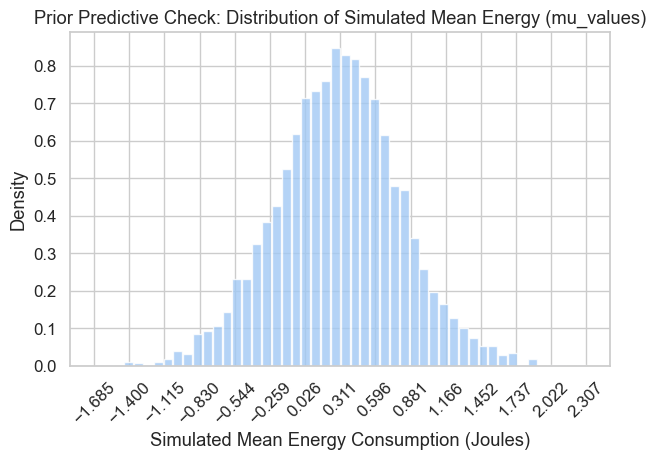


Plotting Prior Distributions for Parameters:


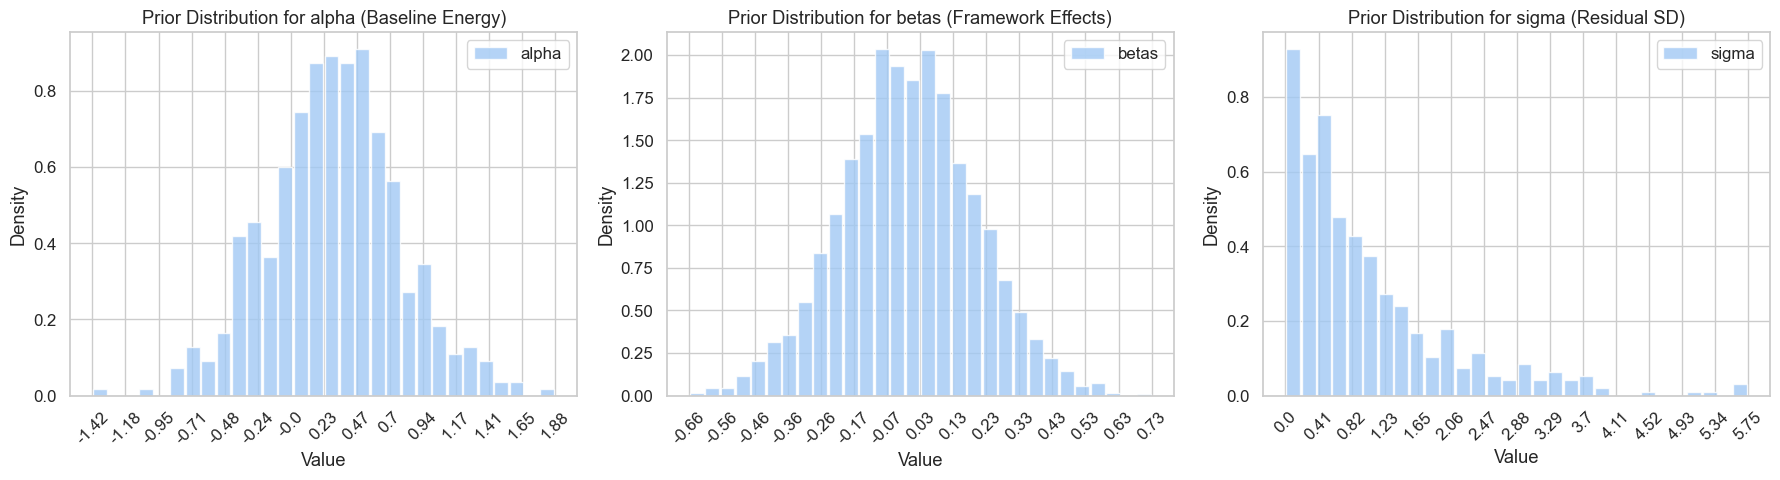


Percentage of simulated energy consumption values (y_simulated) < 0: 37.20%
Percentage of simulated mean energy values (mu_values) < 0: 27.03%


In [70]:
# Number of beta coefficients (number of non-baseline frameworks)
# This assumes 'X' is the DataFrame of dummy variables
num_framework_betas = X.shape[1]

# Define the model for prior predictive checks
with pm.Model() as model_h1_prior_pred:
    # Priors as specified in markdown cell 624665df
    alpha = pm.Normal("alpha", mu = .3, sigma = .5)
    betas = pm.Normal("betas", mu = 0, sigma = .2, shape=num_framework_betas)
    sigma = pm.Exponential("sigma", lam = 1)

    # Deterministic mu for inspection
    mu_deterministic = pm.Deterministic("mu_values", alpha + pm.math.dot(X.values, betas))

    # Likelihood for prior predictive sampling
    y_simulated = pm.Normal("y_simulated", mu=mu_deterministic, sigma=sigma, shape=y.shape[0])

    # Sample from the prior predictive distribution
    prior_pred_samples_h1 = pm.sample_prior_predictive(samples = 500, random_seed = 42)


# Plot the prior predictive distribution for simulated energy consumption (y_simulated)
print("Plotting Prior Predictive Distribution for y_simulated (Energy Consumption):")
simulated_y = prior_pred_samples_h1.prior["y_simulated"].stack(samples=("chain", "draw")).values # Stack simulated values
az.plot_dist(simulated_y, kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 100}) # Plot using ArviZ
plt.xlabel("Simulated Energy Consumption (Joules)")
plt.ylabel("Density")
plt.title("Prior Predictive Check: Distribution of Simulated Energy Consumption (y_simulated)")
x_llimit, x_ulimit = np.quantile(simulated_y, 0.01), np.quantile(simulated_y, 0.99) 
plt.xlim(x_llimit, x_ulimit) # Set x-axis limits to 5% and 95% quantiles
plt.xticks(np.linspace(x_llimit, x_ulimit, num = 15), rotation = 45)
plt.tight_layout()
plt.show()

# Plotting the prior predictive distribution for mu_values
print("\nPlotting Prior Predictive Distribution for mu_values (Mean Energy Consumption):")
mu_values = prior_pred_samples_h1.prior["mu_values"].stack(samples=("chain", "draw"))
az.plot_dist(mu_values, kind="hist", hist_kwargs={'alpha': .8, 'bins': 50})
plt.xlabel("Simulated Mean Energy Consumption (Joules)")
plt.ylabel("Density")
plt.title("Prior Predictive Check: Distribution of Simulated Mean Energy (mu_values)")
x_min, x_max = np.min(mu_values), np.max(mu_values)
x_ticks = np.linspace(x_min, x_max, num = 15)
plt.xticks(x_ticks, rotation = 45)
plt.tight_layout()
plt.show()

# Plotting the distributions of the priors themselves for alpha, betas, and sigma
print("\nPlotting Prior Distributions for Parameters:")
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Alphas
alpha_values = prior_pred_samples_h1.prior["alpha"].stack(samples=("chain", "draw"))
az.plot_dist(alpha_values, ax = axes[0], label = "alpha", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(alpha_values), np.max(alpha_values), num = 15)
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[0].set_title("Prior Distribution for alpha (Baseline Energy)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")

# Betas
beta_values = prior_pred_samples_h1.prior["betas"].stack(samples = ("chain", "draw"))
az.plot_dist(beta_values, ax = axes[1], label = "betas", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(beta_values), np.max(beta_values), num = 15)
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[1].set_title("Prior Distribution for betas (Framework Effects)")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")

# Sigmas
sigma_values = prior_pred_samples_h1.prior["sigma"].stack(samples = ("chain", "draw"))
az.plot_dist(sigma_values, ax = axes[2], label = "sigma", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(sigma_values), np.max(sigma_values), num = 15)
axes[2].set_xticks(x_ticks)
axes[2].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[2].set_title("Prior Distribution for sigma (Residual SD)")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Check for negative energy values
simulated_y_flat = prior_pred_samples_h1.prior["y_simulated"].stack(samples=("chain", "draw")).values
negative_y_percentage = np.mean(simulated_y_flat < 0) * 100
print(f"\nPercentage of simulated energy consumption values (y_simulated) < 0: {negative_y_percentage:.2f}%")

simulated_mu_flat = prior_pred_samples_h1.prior["mu_values"].stack(samples=("chain", "draw")).values
negative_mu_percentage = np.mean(simulated_mu_flat < 0) * 100
print(f"Percentage of simulated mean energy values (mu_values) < 0: {negative_mu_percentage:.2f}%")

In [19]:
### Using PyMC3 to fit a model
# The priors are defined as of described above.
# mu is a combination of alpha and the betas, which are the coefficients for each of the dummy variables.
# The likelihood is defined as a normal distribution with mu and sigma.
# trace_h1 is an InferenceData object that contains the posterior samples, which can be used for further analysis and visualization.

# Sampling quality!!!! ????

### THE PRIORS CHOSEN BELOW ARE BASED ON CHATS ANALYSIS OF THE LANGUAGE COLUMN SO WE NEED TO CHECK IF THEY MAKE SENSE

with pm.Model() as model_h2:
    alpha = pm.Normal("alpha", mu=0.3, sigma=0.1)  # Mean energy for javascript 
    betas = pm.Normal("betas", mu=0, sigma=0.05, shape=X_lang.shape[1])
    sigma = pm.HalfNormal("sigma", sigma=0.1)

    mu = alpha + pm.math.dot(X_lang.values, betas)

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace_h2 = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.37,0.02,0.34,0.41,0.0,0.0,4207.34,5088.51,1.0
betas[1],0.04,0.02,0.01,0.07,0.0,0.0,3716.58,5067.51,1.0
betas[2],0.12,0.02,0.09,0.16,0.0,0.0,4449.74,5433.33,1.0
betas[3],0.12,0.02,0.08,0.16,0.0,0.0,4331.02,5216.95,1.0
betas[4],0.03,0.02,-0.01,0.06,0.0,0.0,4645.30,5477.32,1.0


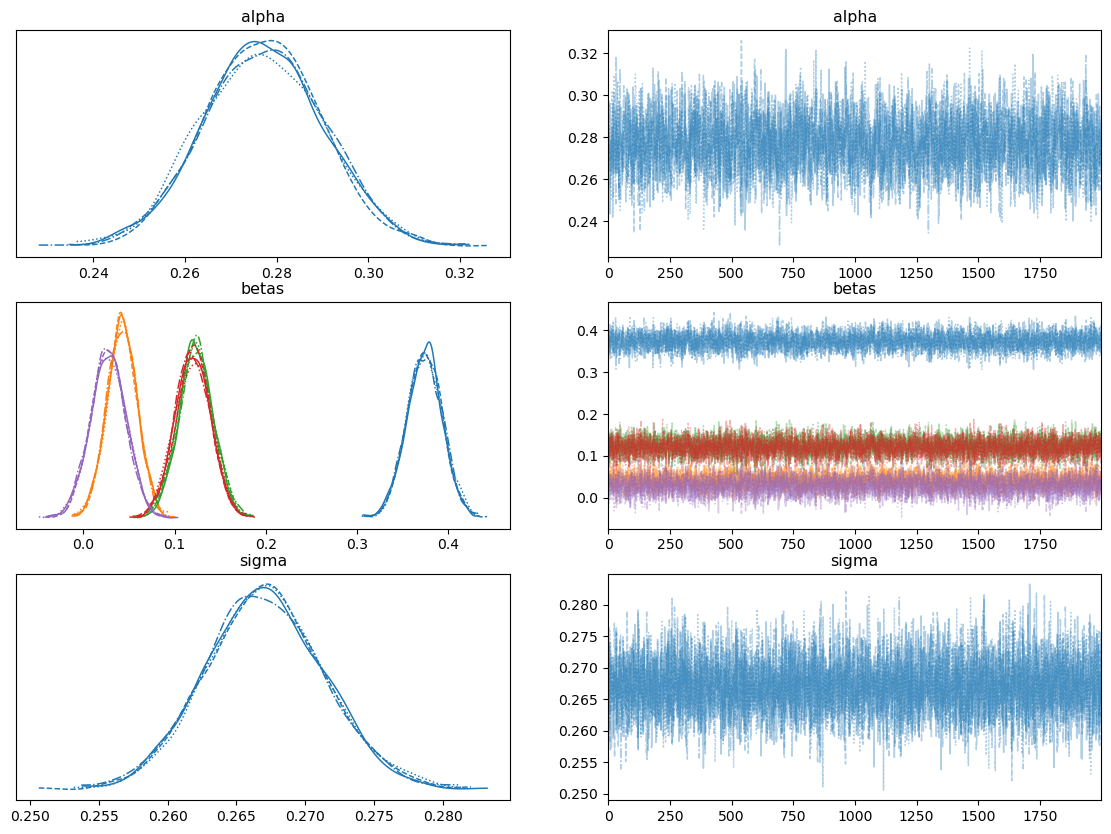

In [20]:
### Plot showing the posterior distributions of the parameters ???

az.plot_trace(trace_h2, var_names=["alpha", "betas", "sigma"], 
              figsize=(14, 10), combined=False)

az.summary(trace_h2, var_names=["betas"], round_to=2)

In [21]:
### Thoughts from the plot above
# The posterior distributions of the parameters are shown in the plot above.

# Bla bla. Beta peaks at around 0.28 bla bla

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

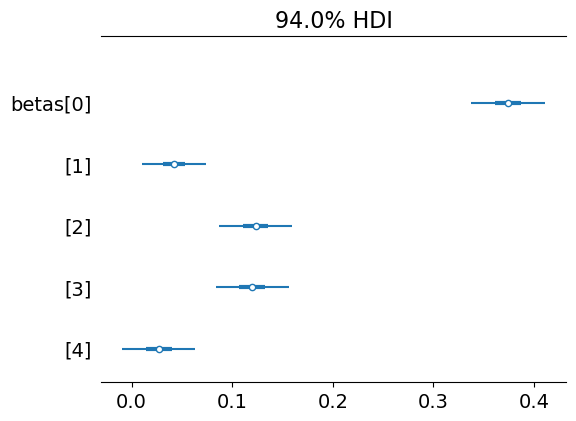

In [22]:
### HDI: Highest Density Interval
# The HDI is the range of values that contains 95% of the posterior distribution.
az.plot_forest(trace_h2, var_names=["betas"], combined=True)

# In this plot, `javascript` is the baseline (intercept) at 0 on the x-axis. 
# Each beta coefficient represents the difference in energy consumption between another language and `javascript`. 
# If a beta coefficient is negative, it means that javascript has significantly higher energy consumption than that beta coefficient.
# If a beta coefficient is positive, it means that javascript has significantly lower energy consumption than that beta coefficient.

# All betas are positive in this sample, and thus javascript has a higher energy consumption than all other languages.
# Specifically, beta[0] seems to have a much higher energy consumption than javascript,
# whereas beta[1]'s and beta[4]'s energy consumptions are closer to that of javascript.

In [23]:
# The following gives the probability that each language consumes more energy than javascript. 
# High probabilities (e.g., > 0.95) support H2.

posterior = trace_h2.posterior
prob_others_more_than_js = (posterior['betas'] > 0).mean(dim=["chain", "draw"])
prob_others_more_than_js = prob_others_more_than_js.to_dataframe().T
print(prob_others_more_than_js)

betas_dim_0    0         1    2    3        4
betas        1.0  0.993875  1.0  1.0  0.91875


In [24]:
### Results of above
# All betas are > 0.9, which means that all languages likely have a higher energy consumption than javascript.
# Although not all are above 0.95, the probabilities are still significantly high across the whole range. 
# Also i guess if we sample the model again it would create a little different results, but each time all betas are above 0.9, 
# so it is quite stable results still.

## 🧮 **Conclusion - H2:**

Through the making of a Bayesian Linear Regression model that compares the other languages to the baseline "language", we have looked at and visualised the results. And with H2 being that, "the programming language `javascript` consumes the least amount of energy compared to any other programming language in the dataset", we find through the above analysis, that we contrarily **don't** have enough evidence to reject H2. It is thus accepted. All other languages likely consume more energy than javascript.

_________________
* **H3** - Runtime has a stronger impact on energy consumption for some API endpoints than others. That is, the effect of runtime on energy consumption is larger for some API endpoints than others.
_________________

Let:

- $y_i $: Energy consumption for observation $i$
- $x_i$: Runtime for observation $ i$
- $e_i$: Endpoint index for observation $ i$

We model:

$
y_i \sim \mathcal{N}(\mu_i, \sigma) \\
\mu_i = \alpha + \gamma_{e_i} + \beta_{e_i} \cdot x_i
$


$
\text{energy}_i = \alpha + \beta_{e[i]} \cdot \text{runtime}_i + \gamma_{e[i]}
$

Where:

- $\alpha$: Global intercept
- $\gamma_{e_i}$: Endpoint-specific intercept deviation
- $\beta_{e_i}$: Endpoint-specific slope (effect of runtime)
- $\sigma$: Observation noise (shared across all endpoints)

Priors:
$
\alpha \sim \mathcal{N}(0, 1) \\
\gamma_{e} \sim \mathcal{N}(0, 1) \quad \text{for each endpoint } e \\
\beta_{e} \sim \mathcal{N}(0, 1) \quad \text{for each endpoint } e \\
\sigma \sim \text{HalfNormal}(1)
$

This model allows the relationship between runtime and energy to vary across endpoints and helps us test whether runtime has a stronger impact on energy consumption in some endpoints than in others.

In [33]:
df['endpoint'].unique()


['/api/register', '/api/msgs/user0', '/api/msgs', '/api/fllws/user', '/api/unfllws/user', ..., '/add_message', '/public', '/user/user0', '/user/unfollow', '/logout']
Length: 14
Categories (14, object): ['/add_message', '/api/fllws/user', '/api/latest', '/api/msgs', ..., '/register', '/user/follow', '/user/unfollow', '/user/user0']

In [31]:
# Convert 'endpoint' to categorical

# Ensure the 'endpoint' column is categorical to extract labels
if not pd.api.types.is_categorical_dtype(df['endpoint']):
    df['endpoint'] = df['endpoint'].astype('category')

# Assign integer codes to each endpoint for indexing
endpoint_codes = df['endpoint'].cat.codes

# Save unique endpoints for coordinate labels
unique_endpoints = df['endpoint'].cat.categories

# Runtime and energy consumption
runtime = df['runtime'].values
energy = df['energy_consumption'].values

/var/folders/c1/phfhvpvx33z0wfs1rywcsz140000gn/T/ipykernel_46175/1921648069.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['endpoint']):


In [32]:
# ## Step 2: Define Bayesian Model
import pymc as pm
import arviz as az

with pm.Model(coords={"endpoint": unique_endpoints}) as model_h3:

    # Data containers for indexing
    endpoint_idx = pm.Data("endpoint_idx", endpoint_codes.values)
    runtime_data = pm.Data("runtime", runtime)

    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=1)  # Shared global intercept

    gamma = pm.Normal("gamma", mu=0, sigma=1, dims="endpoint")  # Per-endpoint intercepts
    beta = pm.Normal("beta", mu=0, sigma=1, dims="endpoint")    # Per-endpoint slopes for runtime

    sigma = pm.HalfNormal("sigma", sigma=1)

    # Linear model
    mu = alpha + gamma[endpoint_idx] + beta[endpoint_idx] * runtime_data

    # Likelihood
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=energy)

    # ## Step 3: Prior Predictive Check
    prior_pred = pm.sample_prior_predictive(samples=100)

    # ## Step 4: Posterior Sampling
    trace_h3 = pm.sample(1000, tune=1000, target_accept=0.9, return_inferencedata=True)

    # ## Step 5: Posterior Predictive Check
    ppc_h3 = pm.sample_posterior_predictive(trace_h3, var_names=["y"])


Sampling: [alpha, beta, gamma, sigma, y]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, gamma, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 180 seconds.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y]


Output()

ValueError: ['posterior_predictive'] group(s) already exists.

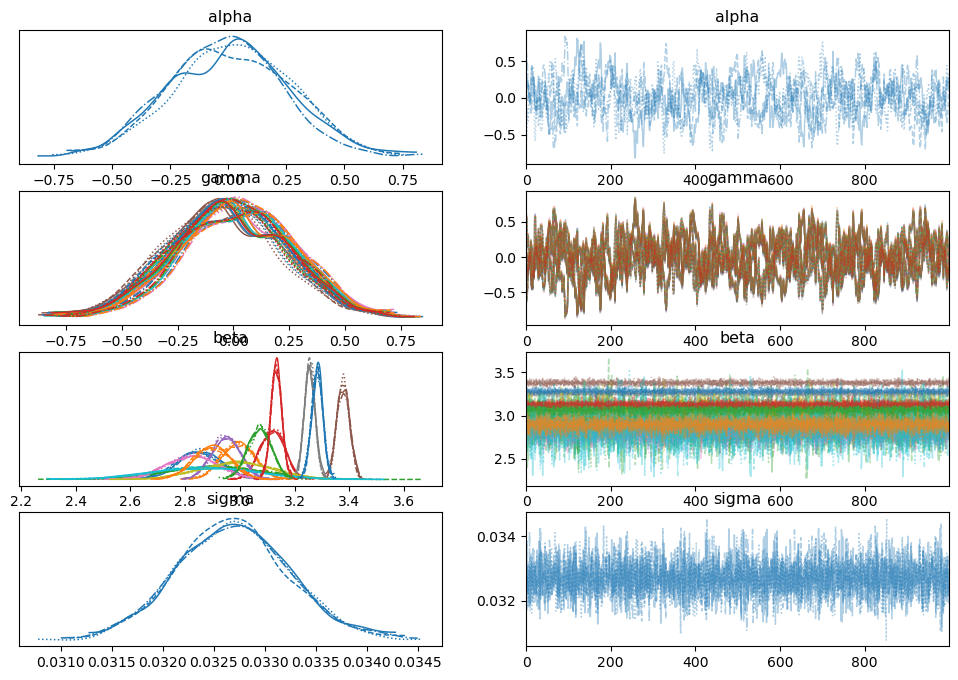

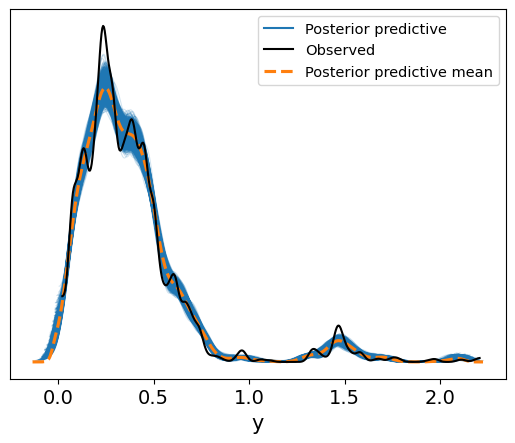

In [37]:
# ## Step 6: Diagnostics and Plots
az.plot_trace(trace_h3, var_names=["alpha", "gamma", "beta", "sigma"])
az.summary(trace_h3, var_names=["alpha", "gamma", "beta", "sigma"])
az.plot_ppc(ppc_h3)


trace_h3.add_groups(posterior_predictive=ppc_h3.posterior_predictive)
az.plot_ppc(trace_h3)



# ## Step 7: Counterfactual Analysis
import numpy as np
import matplotlib.pyplot as plt

large_runtime = np.array([runtime.max() * 2])  # exaggerated runtime
endpoint_idxs = np.arange(len(unique_endpoints))

with model_h3:
    pm.set_data({"runtime": np.repeat(large_runtime, len(endpoint_idxs)),
                 "endpoint_idx": endpoint_idxs})
    counterfactual_predictions = pm.sample_posterior_predictive(trace_h3, var_names=["y"])

# Plot
plt.figure(figsize=(10, 6))
for i, endpoint in enumerate(unique_endpoints):
    y_pred = counterfactual_predictions['y'][:, i]
    az.plot_posterior(y_pred, label=endpoint)

plt.legend(title="Endpoint")
plt.title("Counterfactual Energy Predictions at Large Runtime")
plt.xlabel("Predicted Energy Consumption (Joules)")
plt.show()




## Conclusion
- If the posterior distributions of the per-endpoint slopes (beta) differ significantly, then runtime impacts energy differently across endpoints.
- Posterior predictive checks validate that the model captures the observed trends.
- The counterfactual plot reveals whether runtime dominates energy consumption at extreme values and whether differences between endpoints become more pronounced.